In [70]:
import pylab as pl
import scipy as sp
from numpy.linalg import inv
from scipy.io import loadmat
import pdb
%matplotlib inline

In [71]:
def load_myo_data(fname):
    ''' Loads EMG data from <fname>                      
    '''
    # load the data
    data = loadmat(fname)
    # extract data and hand positions
    X = data['training_data']
    X = sp.log(X)
    Y = data['training_labels']
    #Split data into training and test data
    X_train = X[:, :5000]
    X_test = X[:, 5000:]
    Y_train = Y[:, :5000]
    Y_test = Y[:, 5000:]
    return X_train,Y_train,X_test, Y_test

In [72]:

def train_ols(X_train, Y_train, llambda = 0):
    ''' Trains ordinary least squares (ols) regression 
    Input:       X_train  -  DxN array of N data points with D features
                 Y        -  D2xN array of length N with D2 multiple labels
                 llabmda  -  Regularization parameter
    Output:      W        -  DxD2 array, linear mapping used to estimate labels 
                             with sp.dot(W.T, X)                      
    '''
    #your code here
    XXT = X_train.dot(X_train.T)
    XXTX = inv(XXT + llambda * sp.identity(len(X_train.T[0]))).dot(X_train)
    return XXTX.dot(Y_train.T)

No-noise-case tests passed


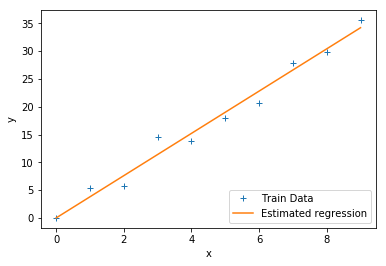

In [73]:
test_assignment4()

In [74]:

def apply_ols(W, X_test):
    ''' Applys ordinary least squares (ols) regression 
    Input:       X_test    -  DxN array of N data points with D features
                 W        -  DxD2 array, linear mapping used to estimate labels 
                             trained with train_ols                   
    Output:     Y_test    -  D2xN array
    '''
    #your code here
    return W.T.dot(X_test)

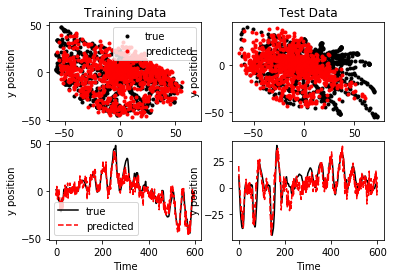

In [78]:
load_myo_data("myo_data.mat")
predict_handposition()

In [37]:
def predict_handposition():
    X_train,Y_train,X_test, Y_test = load_myo_data('myo_data.mat')
    # compute weight vector with linear regression
    W = train_ols(X_train, Y_train)
    # predict hand positions
    Y_hat_train = apply_ols(W, X_train)
    Y_hat_test = apply_ols(W, X_test) 
        
    pl.figure()
    pl.subplot(2,2,1)
    pl.plot(Y_train[0,:1000],Y_train[1,:1000],'.k',label = 'true')
    pl.plot(Y_hat_train[0,:1000],Y_hat_train[1,:1000],'.r', label = 'predicted')
    pl.title('Training Data')
    pl.xlabel('x position')
    pl.ylabel('y position')
    pl.legend(loc = 0)
    
    pl.subplot(2,2,2)
    pl.plot(Y_test[0,:1000],Y_test[1,:1000],'.k')
    pl.plot(Y_hat_test[0,:1000],Y_hat_test[1,:1000],'.r')
    pl.title('Test Data')
    pl.xlabel('x position')
    pl.ylabel('y position')
    
    pl.subplot(2,2,3)
    pl.plot(Y_train[1,:600], 'k', label = 'true')
    pl.plot(Y_hat_train[1,:600], 'r--', label = 'predicted')
    pl.xlabel('Time')
    pl.ylabel('y position')
    pl.legend(loc = 0)
    
    pl.subplot(2,2,4)
    pl.plot(Y_test[1,:600],'k')
    pl.plot(Y_hat_test[1,:600], 'r--')
    pl.xlabel('Time')
    pl.ylabel('y position')
    

In [38]:


	

def test_assignment4():
    ##Example without noise
    x_train = sp.array([[ 0,  0,  1 , 1],[ 0,  1,  0, 1]])
    y_train = sp.array([[0, 1, 1, 2]])
    w_est = train_ols(x_train, y_train) 
    w_est_ridge = train_ols(x_train, y_train, llambda = 1)
    assert(sp.all(w_est.T == [[1, 1]])) 
    assert(sp.all(w_est_ridge.T == [[.75, .75]]))
    y_est = apply_ols(w_est,x_train)
    assert(sp.all(y_train == y_est)) 
    print 'No-noise-case tests passed'
	
	##Example with noise
	#Data generation
    w_true = 4
    X_train = sp.arange(10)
    X_train = X_train[None,:]
    Y_train = w_true * X_train + sp.random.normal(0,2,X_train.shape)
    #Regression 
    w_est = train_ols(X_train, Y_train) 
    Y_est = apply_ols(w_est,X_train)
    #Plot result
    pl.figure()
    pl.plot(X_train.T, Y_train.T, '+', label = 'Train Data')
    pl.plot(X_train.T, Y_est.T, label = 'Estimated regression')
    pl.xlabel('x')
    pl.ylabel('y')
    pl.legend(loc = 'lower right')

In [65]:
test_assignment4()

No-noise-case tests passed


In [199]:
def test_polynomial_regression(grade = 4):
    d_toy = sp.sin(sp.arange(11)) + sp.random.normal(0, 0.5, 11)
    d_toy = sp.stack([sp.arange(11), d_toy, sp.sin(sp.arange(11))])
    pl.scatter(d_toy[0], d_toy[1], marker='+', c='black')
    #pl.scatter(sp.arange(11), d_toy, marker='+', c='black')
    pl.axis([0, 10, -3, 3])
    dom = sp.arange(0,11,0.3)
    pl.plot(dom, sp.sin(dom))
    from numpy.random import choice
    #train = choice(d_toy.T, [grade])
    train = choice(sp.arange(11), [grade])
    train = d_toy.T[train]
    #print(train)
    print(train[:,[0,1]].T)
    print(train[:,[-1]].T)
    W = train_ols(train[:,[0,1]], train[:,[-1]])
    print(W)
    Y = apply_ols(W, train[:,[0,1]].T)
    pl.plot(d_toy[:,[0,1]], Y)

[[  3.           8.          10.           7.        ]
 [  0.17759084   1.03919691  -0.68857212   0.83164526]]
[[ 0.14112001  0.98935825 -0.54402111  0.6569866 ]]


LinAlgError: Singular matrix

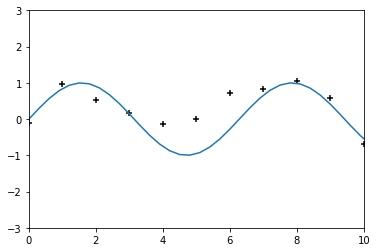

In [200]:
test_polynomial_regression()